 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [643]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [644]:
# Reading whale returns
whaleCsv = 'whale_returns.csv'
whale_pd = pd.read_csv(whaleCsv)

# convert the datetime format
whale_pd['Date'] = pd.to_datetime(whale_pd['Date'], format='%Y-%m-%d')

# set the date as an index
whale_pd.set_index('Date', inplace=True)

# sort the index ascending
whale_pd.sort_index(inplace=True)

# print
print(whale_pd.head())


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  


In [645]:
# Count nulls
whale_null_count = whale_pd.isnull().sum()
whale_null_count.head()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [646]:
# Drop nulls
whale_returns = whale_pd.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [647]:
# Reading algorithmic returns
algoCsv = 'algo_returns.csv'
algo_pd = pd.read_csv(algoCsv)

algo_pd['Date'] = pd.to_datetime(algo_pd['Date'], format='%Y-%m-%d')

algo_pd.set_index('Date', inplace=True)

algo_pd.sort_index(inplace=True)

print(algo_pd.head())

              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN


In [648]:
# Count nulls
algo_null_count = algo_pd.isnull().sum()
algo_null_count.head()

Algo 1    0
Algo 2    6
dtype: int64

In [649]:
# Drop nulls
algo_returns = algo_pd.dropna()
# algo_returns.dtypes
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [650]:
# Reading S&P 500 Closing Prices
sp500Csv = 'sp500_history.csv'

sp500_pd = pd.read_csv(sp500Csv, index_col='Date', parse_dates=True, infer_datetime_format=True)


sp500_pd.sort_index(inplace=True)

sp500_pd.index.strftime("%Y-%m-%d")



sp500_pd.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [651]:
# Check Data Types
# Check data types of the DataFrame columns
print(sp500_pd.dtypes)


Close    object
dtype: object


In [652]:
# Fix Data Types
sp500_pd["Close"] = sp500_pd["Close"].str.replace("$", "", regex=True)

# Convert the 'Close' column to int64 data type
sp500_pd['Close'] = sp500_pd['Close'].astype('float')

# sp500_pd.dtypes
sp500_pd.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [653]:
# Calculate Daily Returns

sp500_daily = sp500_pd.pct_change()


sp500_daily.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [654]:
# Drop nulls
sp500_daily = sp500_daily.dropna()
sp500_daily.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [655]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily = sp500_daily.rename(columns={'Close': 'SP500 Daily Returns'})

sp500_daily.head()

,SP500 Daily Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [1284]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_returns = pd.concat([whale_returns, algo_returns, sp500_daily], axis=1)

combined_returns.dropna(inplace=True)
# Verify the updated DataFrame
print(combined_returns)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496             

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

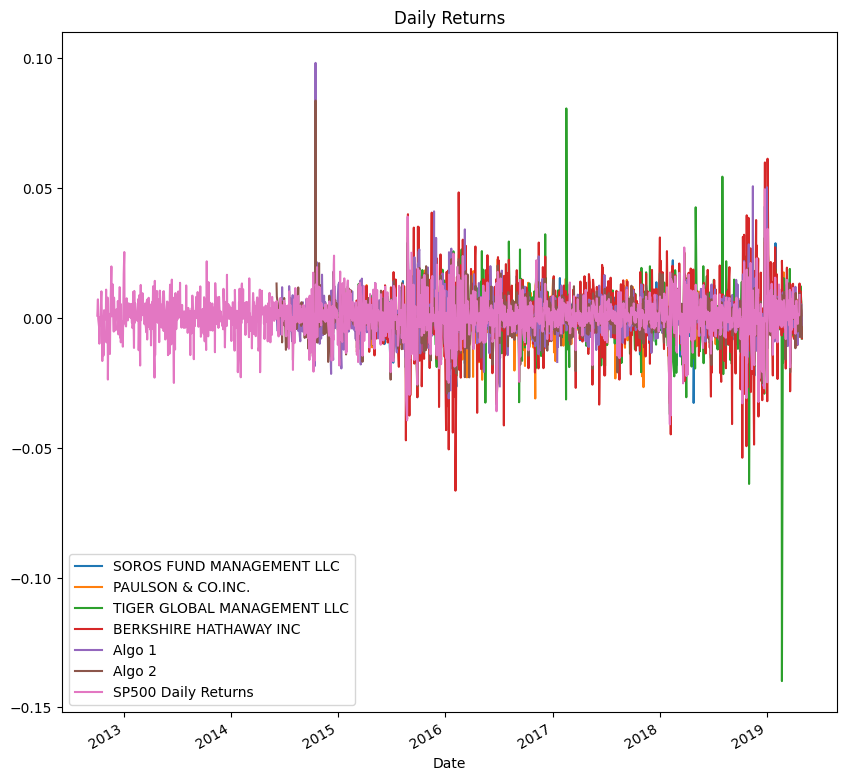

In [682]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(10,10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

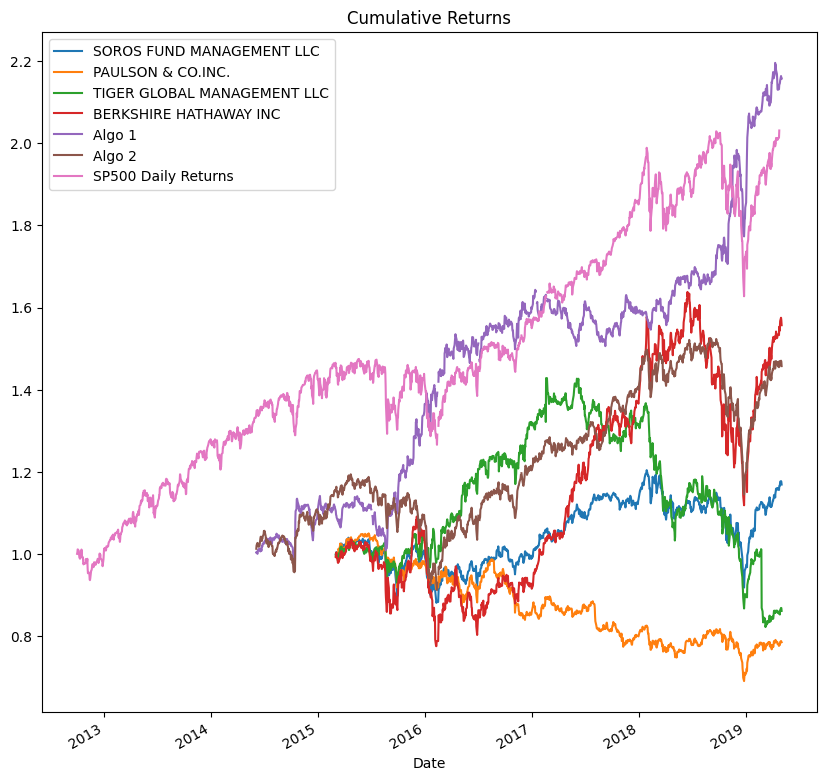

In [681]:
# Calculate cumulative returns of all portfolios
cumu_returns = (1+combined_returns).cumprod()
cumu_returns.plot(figsize=(10,10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Risk'}>

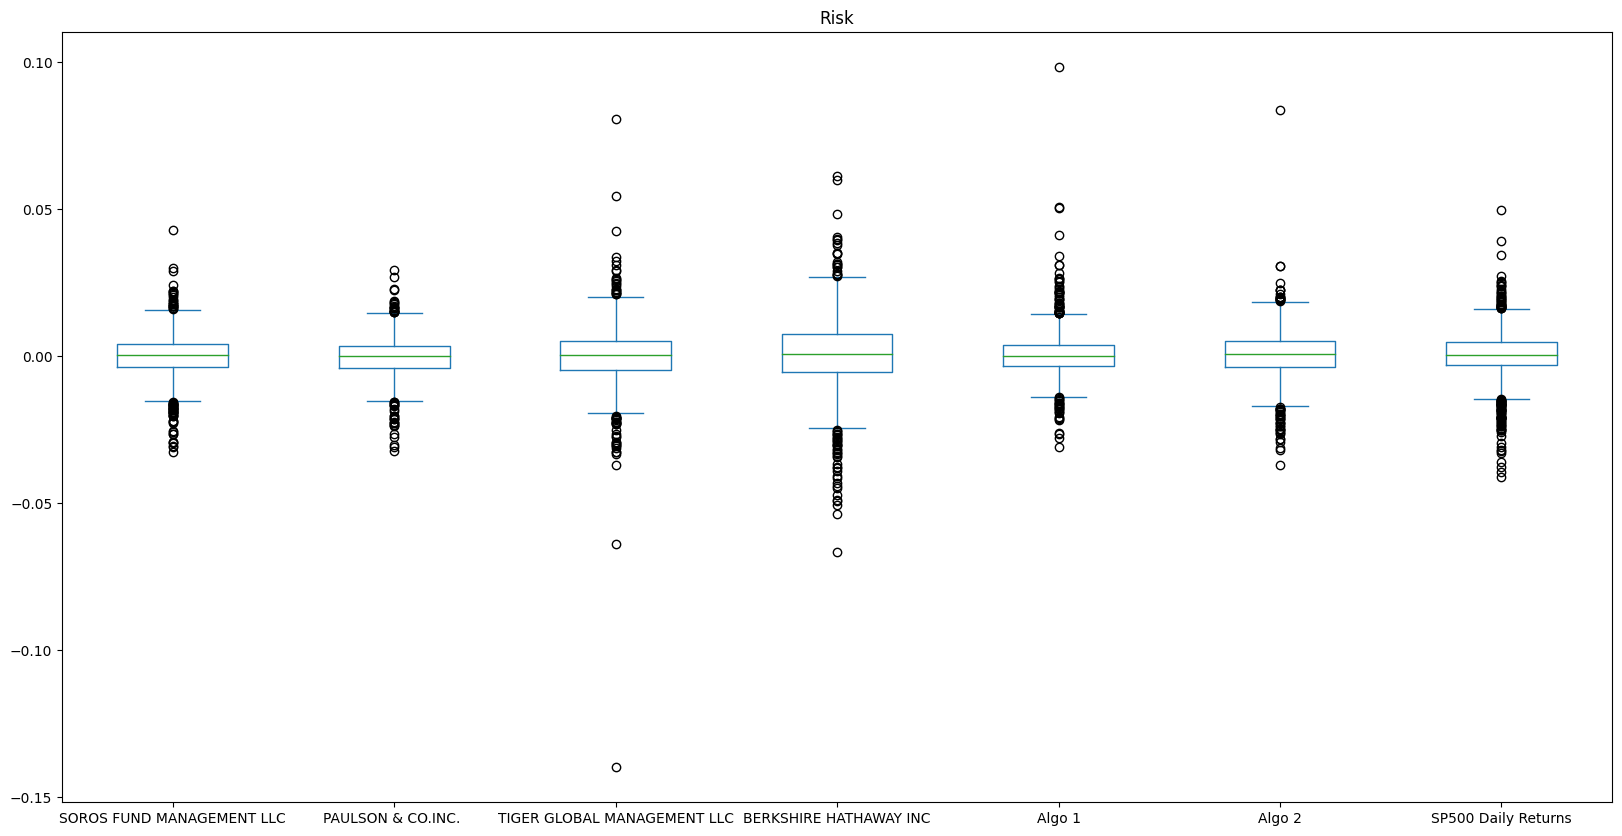

In [680]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(20,10), title="Risk")

### Calculate Standard Deviations

In [662]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_returns.std()
combined_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007988
Algo 2                         0.008466
SP500 Daily Returns            0.008111
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [665]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_daily.std()
sp500_std.head()


# Determine which portfolios are riskier than the S&P 500
print("Tiger Global, Berkshire Hathaway, and Algo 2 are riskier than the S&P500") 

Tiger Global, Berkshire Hathaway, and Algo 2 are riskier than the S&P500


### Calculate the Annualized Standard Deviation

In [1076]:
# Calculate the annualized standard deviation (252 trading days)
combined_std = combined_returns.std() * np.sqrt(252)
combined_std.head(10)

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
Algo 1                         0.126801
Algo 2                         0.134401
SP500 Daily Returns            0.128762
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling 21-Day Window'}, xlabel='Date'>

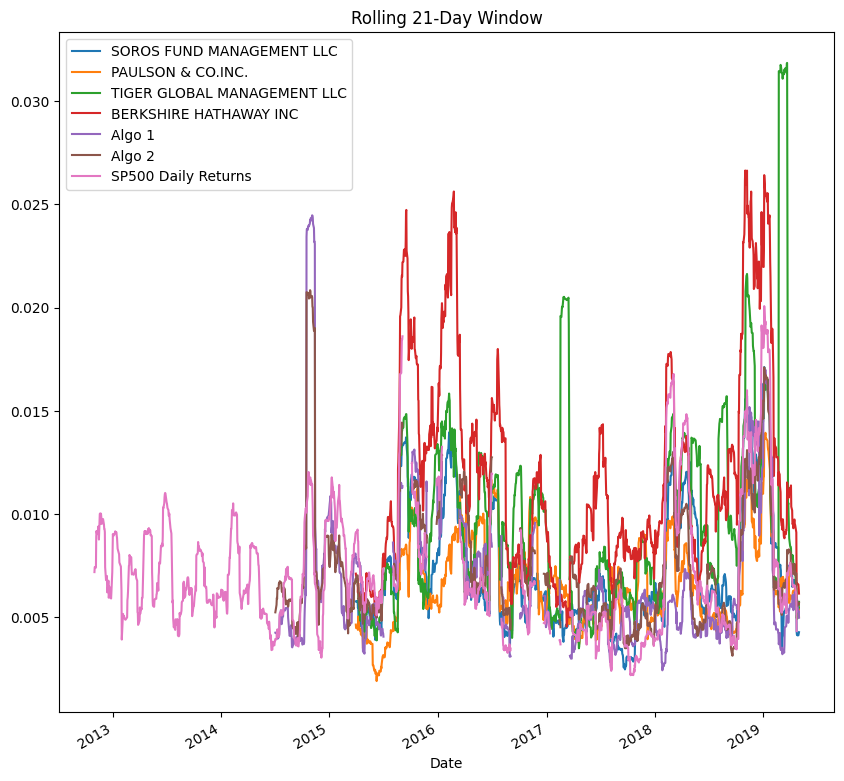

In [677]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Calculate the rolling standard deviation with a 21-day window
rolling_std = combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(10,10), title="Rolling 21-Day Window")

### Calculate and plot the correlation

<Axes: title={'center': 'Correlation Matrix'}>

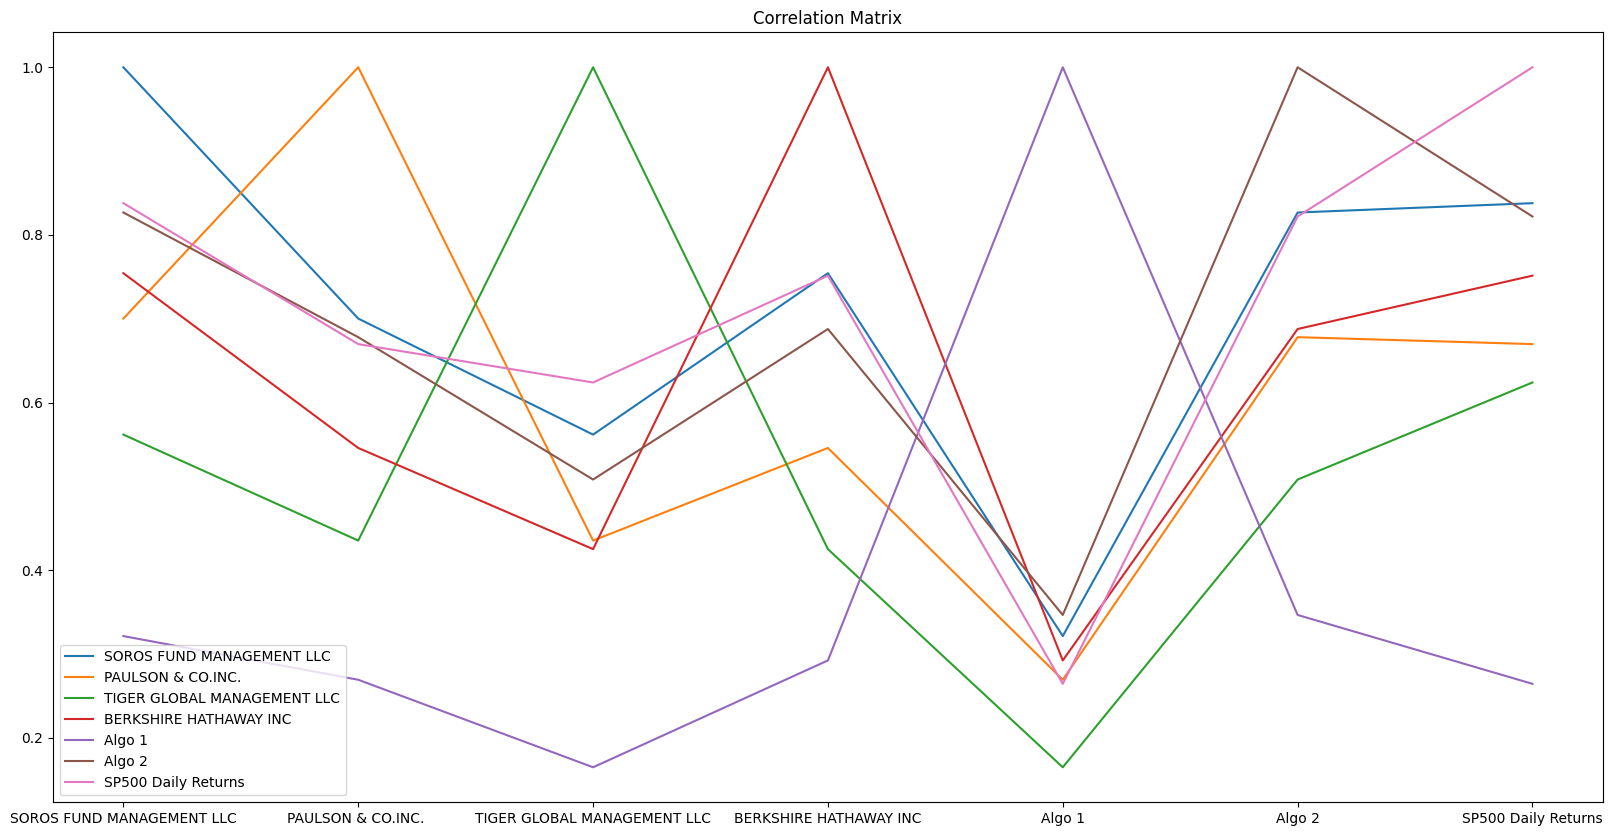

In [684]:
# Calculate the correlation
# Calculate the correlation matrix
correlation_matrix = combined_returns.corr()

# Display the correlation matrix
correlation_matrix.plot(figsize=(20,10), title="Correlation Matrix")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

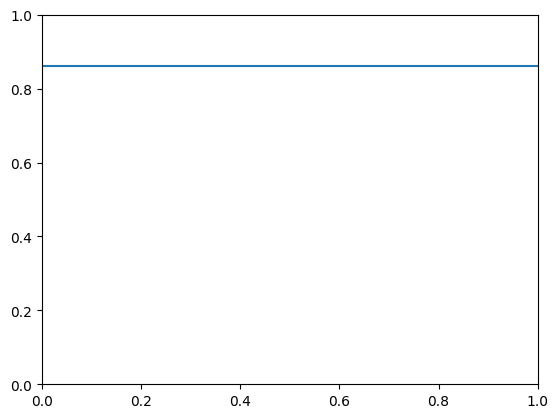

In [712]:
import matplotlib.pyplot as plt

# Calculate covariance of a single portfolio
covariance = combined_returns["SOROS FUND MANAGEMENT LLC"].cov(combined_returns["SP500 Daily Returns"])

# Calculate variance of S&P 500
variance = combined_returns["SP500 Daily Returns"].var()

# Compute beta
beta_trend = covariance / variance

beta_trend

# Plot beta trend as a horizontal line
plt.axhline(y=beta_trend, label='Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [1074]:
# Use `ewm` to calculate the rolling window
# Calculate the rolling window using EWMA
rolling_std = combined_returns.ewm(halflife=21).std()
rolling_std.dropna(inplace=True)
# Display the result
print(rolling_std)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-04                   0.002472            0.005814   
2015-03-05                   0.002677            0.004968   
2015-03-06                   0.005349            0.004615   
2015-03-09                   0.004638            0.004471   
2015-03-10                   0.005816            0.004707   
...                               ...                 ...   
2019-04-25                   0.007066            0.006472   
2019-04-26                   0.007054            0.006569   
2019-04-29                   0.006939            0.006475   
2019-04-30                   0.006845            0.006387   
2019-05-01                   0.006860            0.006290   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-04                     0.001441             

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [715]:
# Annualized Sharpe Ratios
import numpy as np

# Calculate the average annual returns
annual_returns = combined_returns.mean() * 252

# Calculate the annualized standard deviation
annual_std = combined_returns.std() * np.sqrt(252)

# Calculate the risk-free rate (assumed to be 0 in this example)
risk_free_rate = 0

# Calculate the Sharpe ratios
sharpe_ratios = (annual_returns - risk_free_rate) / annual_std

# Display the Sharpe ratios
print(sharpe_ratios)


SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
Algo 1                         1.300176
Algo 2                         0.639258
SP500 Daily Returns            0.906028
dtype: float64


<Axes: title={'center': 'Sharpe Ratios'}>

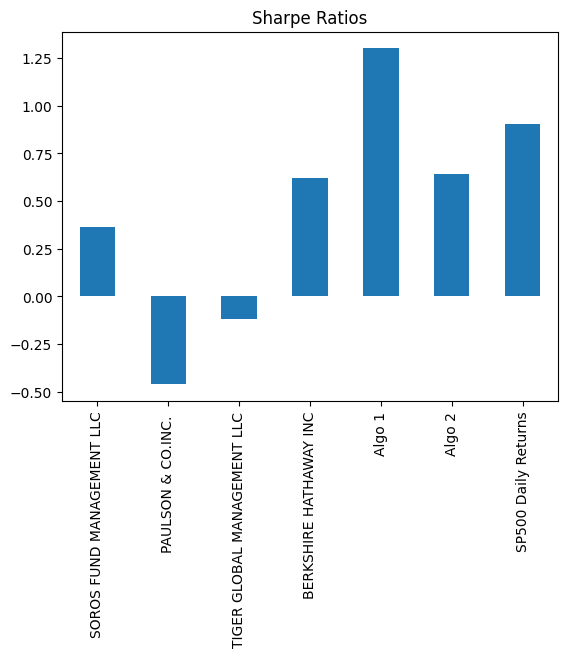

In [795]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [796]:
print("The algorithmic strategies did well, Algo 1 out performed the SP500 and the whale portfolios while Algo 2 outperformed the whale portfolios but not the SP500. Both algos do have great risk adjusted returns.")

The algorithmic strategies did well, Algo 1 out performed the SP500 and the whale portfolios while Algo 2 outperformed the whale portfolios but not the SP500. Both algos do have great risk adjusted returns.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [1303]:
# Reading data from 1st stock
goog = 'goog_historical.csv'
goog_pd = pd.read_csv(goog)

# Convert Trade DATE column to datetime format
goog_pd['Trade DATE'] = pd.to_datetime(goog_pd['Trade DATE'])

# Convert Trade DATE column to year/month/day format
goog_pd['Trade DATE'] = goog_pd['Trade DATE'].dt.strftime('%Y-%m-%d')

print(goog_pd.head())

  Symbol  Trade DATE     NOCP
0   GOOG  2019-05-09  1162.38
1   GOOG  2019-05-08  1166.27
2   GOOG  2019-05-07  1174.10
3   GOOG  2019-05-06  1189.39
4   GOOG  2019-05-03  1185.40


In [1304]:
# Reading data from 2nd stock
cost = 'cost_historical.csv'
cost_pd = pd.read_csv(cost)

# Convert Trade DATE column to datetime format
cost_pd['Trade DATE'] = pd.to_datetime(cost_pd['Trade DATE'])

# Convert Trade DATE column to year/month/day format
cost_pd['Trade DATE'] = cost_pd['Trade DATE'].dt.strftime('%Y-%m-%d')

cost_pd.head()

,Symbol,Trade DATE,NOCP
0,COST,2019-05-09,243.47
1,COST,2019-05-08,241.34
2,COST,2019-05-07,240.18
3,COST,2019-05-06,244.23
4,COST,2019-05-03,244.62


In [1305]:
# Reading data from 3rd stock
aapl = 'aapl_historical.csv'
aapl_pd = pd.read_csv(aapl)

# Convert Trade DATE column to datetime format
aapl_pd['Trade DATE'] = pd.to_datetime(aapl_pd['Trade DATE'])

# Convert Trade DATE column to year/month/day format
aapl_pd['Trade DATE'] = aapl_pd['Trade DATE'].dt.strftime('%Y-%m-%d')

aapl_pd.head()

,Symbol,Trade DATE,NOCP
0,AAPL,2019-05-09,200.72
1,AAPL,2019-05-08,202.90
2,AAPL,2019-05-07,202.86
3,AAPL,2019-05-06,208.48
4,AAPL,2019-05-03,211.75


In [1306]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([goog_pd, cost_pd, aapl_pd], axis="columns", join="inner")

# all_stocks.sort
# Assign the name 'my port' to the DataFrame

all_stocks.head()

,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP
0,GOOG,2019-05-09,1162.38,COST,2019-05-09,243.47,AAPL,2019-05-09,200.72
1,GOOG,2019-05-08,1166.27,COST,2019-05-08,241.34,AAPL,2019-05-08,202.90
2,GOOG,2019-05-07,1174.10,COST,2019-05-07,240.18,AAPL,2019-05-07,202.86
3,GOOG,2019-05-06,1189.39,COST,2019-05-06,244.23,AAPL,2019-05-06,208.48
4,GOOG,2019-05-03,1185.40,COST,2019-05-03,244.62,AAPL,2019-05-03,211.75


In [1307]:
# Reset Date index
# all_stocks_reset_index = all_stocks.set_index('Trade DATE')

# Reset Date index
all_stocks_reset_index = all_stocks.set_index('Trade DATE')

# # Extract the first item from the index values
all_stocks_reset_index.index = all_stocks_reset_index.index.to_series().apply(lambda x: x[0])

# Print the updated DataFrame
print(all_stocks_reset_index)



           Symbol     NOCP Symbol    NOCP Symbol    NOCP
Trade DATE                                              
2019-05-09   GOOG  1162.38   COST  243.47   AAPL  200.72
2019-05-08   GOOG  1166.27   COST  241.34   AAPL  202.90
2019-05-07   GOOG  1174.10   COST  240.18   AAPL  202.86
2019-05-06   GOOG  1189.39   COST  244.23   AAPL  208.48
2019-05-03   GOOG  1185.40   COST  244.62   AAPL  211.75
...           ...      ...    ...     ...    ...     ...
2018-05-17   GOOG  1078.59   COST  199.60   AAPL  186.99
2018-05-16   GOOG  1081.77   COST  198.71   AAPL  188.18
2018-05-15   GOOG  1079.23   COST  195.48   AAPL  186.44
2018-05-14   GOOG  1100.20   COST  195.88   AAPL  188.15
2018-05-11   GOOG  1098.26   COST  195.76   AAPL  188.59

[250 rows x 6 columns]


In [1308]:
# Reorganize portfolio data by having a column per symbol
all_stocks_reset_index = all_stocks_reset_index[['NOCP']]

all_stocks_reset_index.columns = ['GOOG', 'COST', 'AAPL']

print(all_stocks_reset_index)



               GOOG    COST    AAPL
Trade DATE                         
2019-05-09  1162.38  243.47  200.72
2019-05-08  1166.27  241.34  202.90
2019-05-07  1174.10  240.18  202.86
2019-05-06  1189.39  244.23  208.48
2019-05-03  1185.40  244.62  211.75
...             ...     ...     ...
2018-05-17  1078.59  199.60  186.99
2018-05-16  1081.77  198.71  188.18
2018-05-15  1079.23  195.48  186.44
2018-05-14  1100.20  195.88  188.15
2018-05-11  1098.26  195.76  188.59

[250 rows x 3 columns]


In [1309]:
# Calculate daily returns
all_stocks_daily_returns = all_stocks_reset_index.pct_change()

# Drop NAs
all_stocks_daily_returns = all_stocks_daily_returns.dropna()

# Display sample data
all_stocks_daily_returns.head()

,GOOG,COST,AAPL
Trade DATE,,,
2019-05-08,0.003347,-0.008749,0.010861
2019-05-07,0.006714,-0.004806,-0.000197
2019-05-06,0.013023,0.016862,0.027704
2019-05-03,-0.003355,0.001597,0.015685
2019-05-02,-0.019226,-0.007890,-0.012279


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [1310]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_return = all_stocks_daily_returns.dot(weights)

# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_return = all_stocks_daily_returns.dot(weights)

# Combine with other columns
port_return_df = pd.concat([all_stocks_daily_returns, port_return], axis=1)
port_return_df.columns = ['GOOG', 'COST', 'AAPL', 'My Portfolio']

# Select only the 'My Portfolio' column as a DataFrame
my_portfolio = pd.DataFrame(port_return_df['My Portfolio'])

# Display the 'My Portfolio' DataFrame
print(my_portfolio)




            My Portfolio
Trade DATE              
2019-05-08      0.001820
2019-05-07      0.000570
2019-05-06      0.019196
2019-05-03      0.004642
2019-05-02     -0.013131
...                  ...
2018-05-17      0.006112
2018-05-16      0.001618
2018-05-15     -0.009283
2018-05-14      0.010216
2018-05-11     -0.000012

[249 rows x 1 columns]


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [1311]:
# Join your returns DataFrame to the original returns DataFrame
# Convert the index of my_portfolio DataFrame to datetime
my_portfolio.index = pd.to_datetime(my_portfolio.index)

# Join the combined_returns and my_portfolio DataFrames
join_df = combined_returns.join(my_portfolio)

# Display the joined DataFrame
print(join_df)




            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Trade DATE                                                  
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Trade DATE                                                                  
2015-03-03                    -0.000496             

In [1312]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
join_df.dropna(inplace=True)
print(join_df)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Trade DATE                                                  
2018-05-11                  -0.004717            0.000982   
2018-05-14                   0.000000            0.000000   
2018-05-15                  -0.000726           -0.001409   
2018-05-16                   0.008637            0.006244   
2018-05-17                  -0.001955            0.002524   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Trade DATE                                                                  
2018-05-11                     0.002624             

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [1313]:
# Calculate the annualized `std`
new_std = join_df.std() * np.sqrt(252)
print(new_std)

SOROS FUND MANAGEMENT LLC      0.146455
PAULSON & CO.INC.              0.116489
TIGER GLOBAL MANAGEMENT LLC    0.232069
BERKSHIRE HATHAWAY INC         0.246672
Algo 1                         0.133423
Algo 2                         0.139262
SP500 Daily Returns            0.151739
My Portfolio                   0.212687
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling STD'}, xlabel='Trade DATE'>

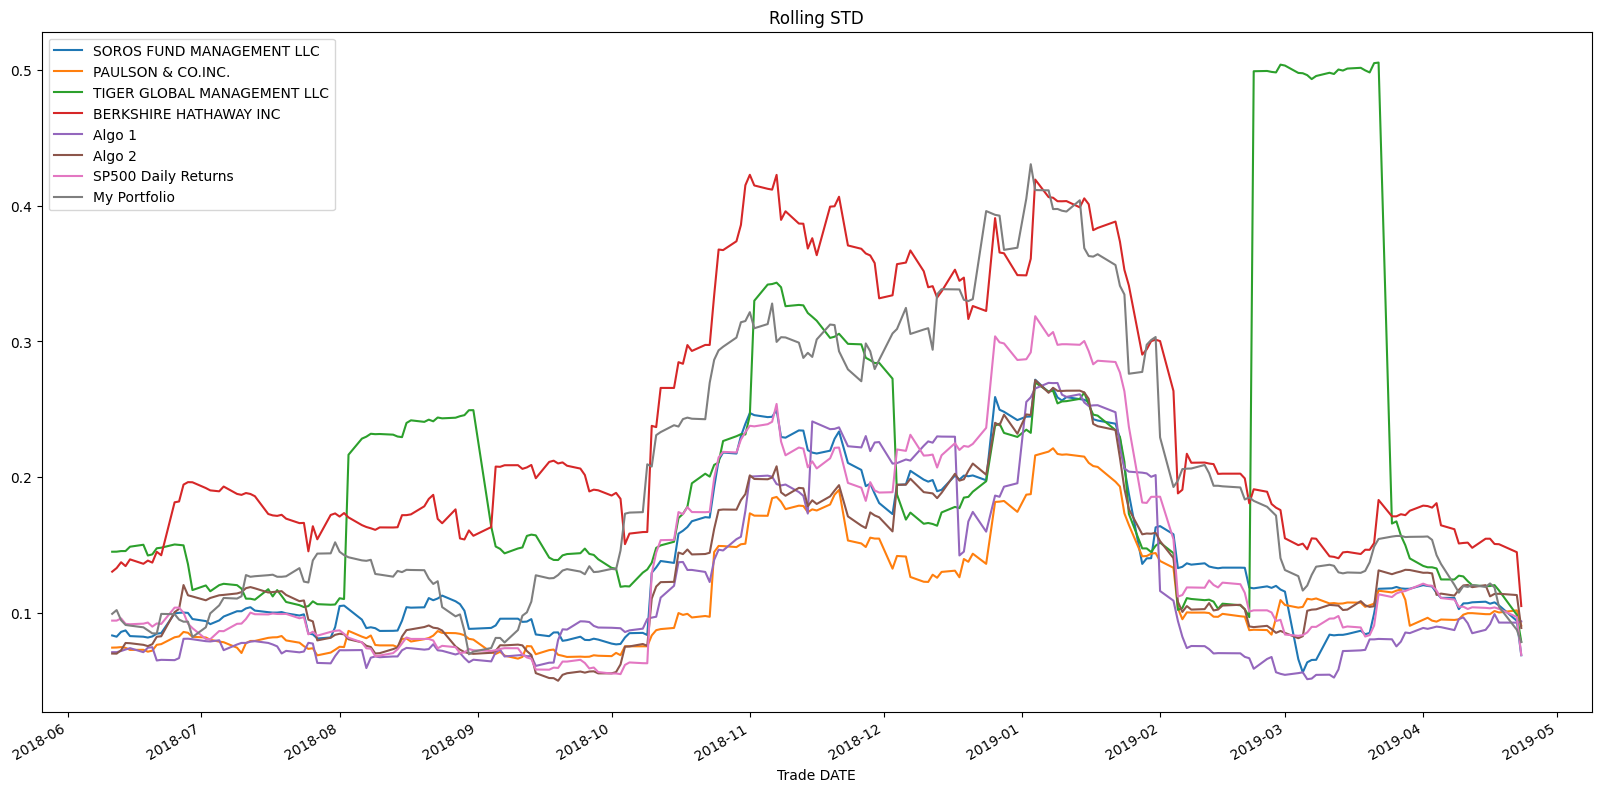

In [1317]:
# Calculate rolling standard deviation
rolling_std = join_df.rolling(window=21).std() * np.sqrt(252)
# Plot rolling standard deviation
rolling_std.plot(figsize=(20,10), title="Rolling STD")

### Calculate and plot the correlation

<Axes: >

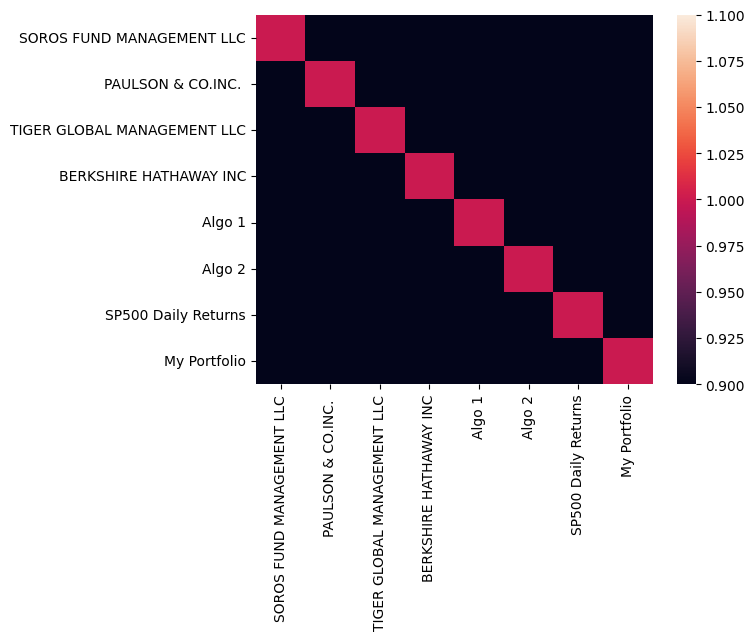

In [1318]:
# Calculate and plot the correlation

correlation = join_df.corr()

import seaborn as sns

# Plot correlation heatmap
sns.heatmap(correlation, vmin=1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60-day Beta: My Portfolio vs. S&P 500'}, xlabel='Trade DATE'>

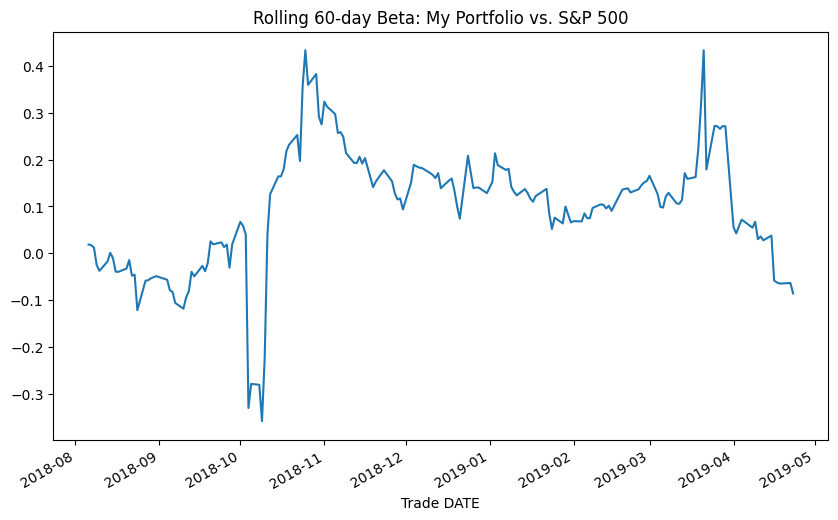

In [1320]:
# Calculate and plot Beta
# Calculate rolling covariance
rolling_cov = join_df['My Portfolio'].rolling(window=60).cov(join_df['SP500 Daily Returns'])

# Calculate rolling variance of SP500 returns
rolling_var = join_df['SP500 Daily Returns'].rolling(window=60).var()

# Calculate rolling beta
rolling_beta = rolling_cov / rolling_var

# Plot the rolling beta
plt.figure(figsize=(10, 6))
rolling_beta.plot(title='Rolling 60-day Beta: My Portfolio vs. S&P 500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [1326]:
# Calculate Annualized Sharpe Ratios
# Risk-free rate (assumed to be 0 in this example)
risk_free_rate = 0

# Calculate the daily excess returns
portfolio_excess_returns = join_df['My Portfolio'] - risk_free_rate
sp500_excess_returns = join_df['SP500 Daily Returns'] - risk_free_rate

# Calculate the average daily excess returns
portfolio_avg_excess_return = portfolio_excess_returns.mean()
sp500_avg_excess_return = sp500_excess_returns.mean()

# Calculate the standard deviation of the daily excess returns
portfolio_std = portfolio_excess_returns.std()
sp500_std = sp500_excess_returns.std()

# Calculate the annualized Sharpe ratios
portfolio_sharpe_ratio = (portfolio_avg_excess_return / portfolio_std) * np.sqrt(252)
sp500_sharpe_ratio = (sp500_avg_excess_return / sp500_std) * np.sqrt(252)

print("Portfolio Sharpe Ratio:", portfolio_sharpe_ratio)
print("S&P 500 Sharpe Ratio:", sp500_sharpe_ratio)


Portfolio Sharpe Ratio: -0.6143302900698472
S&P 500 Sharpe Ratio: 0.5954862539330017


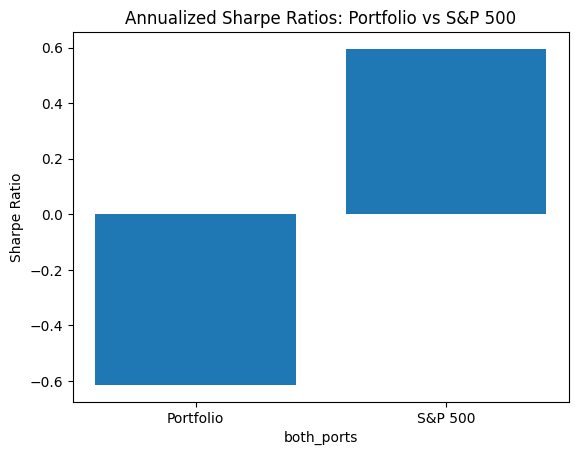

In [1327]:
# Visualize the sharpe ratios as a bar plot
import numpy as np
import matplotlib.pyplot as plt

# Calculate Annualized Sharpe Ratios
portfolio_sharpe_ratio = -0.6143302900698472
sp500_sharpe_ratio = 0.5954862539330017

# Create a bar plot
both_ports = ['Portfolio', 'S&P 500']
sharpe_ratios = [portfolio_sharpe_ratio, sp500_sharpe_ratio]

plt.bar(assets, sharpe_ratios)
plt.xlabel('both_ports')
plt.ylabel('Sharpe Ratio')
plt.title('Annualized Sharpe Ratios: Portfolio vs S&P 500')
plt.show()


### How does your portfolio do?

Write your answer here!

In [1329]:
print("Based on these Sharpe ratios soley, the S&P 500 outperformed My Portfolio in terms of risk-adjusted returns.")

Based on these Sharpe ratios soley, the S&P 500 outperformed My Portfolio in terms of risk-adjusted returns.
